<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_drainflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created on August 20, 2024

Purpose: Superimpose all Mason Creek gauge readings to determine lag & response time of drain.

## Compile streamflow data for all reaches

In [1]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
## ------------------------ ##
##  Major Reach Flow Files  ##
## ------------------------ ##
# main flow for each reach delineation (Qin/Qout)

solomon_highline = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-drain-at-highline.csv')

solomon_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-Drain-at-marble-front.csv')

purdum_sweetwater = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-Sweetwater.csv')

purdum_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-the-Phyllis.csv')

mason_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Madison.csv')

mason_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Ustick-and-Northside.csv')

mason_madison = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-Marble-front-Rd.csv')

mason_northside = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Phyllis.csv')

mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={
    'X_00060_00003': 'Flow',
    'Date': 'Time'
}, inplace=True)

In [113]:
## ------------------------ ##
##  Minor Reach Flow Files    ##
## ------------------------ ##
# minor flow for each reach delineation (feeders,laterals,etc.)

spill_100 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/100-Spill.csv')

east13_3_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/13-3-East-Spill.csv')

spill_200 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/200-Spill.csv')

spill_400 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/400-spill.csv')

spill_500 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/500-spill.csv')

spill_8_26 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/8-26-Spill.csv')

bicandi = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Bicandi.csv')

mason_highline_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Highline-spill-into-Mason.csv')

mason_feeder = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Feeder.csv')

noble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Noble-Drain.csv')

mcdc = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason-Creek-Ditch-Company.csv')

In [114]:
# Function to create a new DataFrame with daily averages
def create_gauge_df(df, gauge_name, time_column='timestamp', flow_column='flow'):
    df[time_column] = pd.to_datetime(df[time_column])
    df.set_index(time_column, inplace=True)
    df_daily = df.resample('D').mean()  # Resample by day and calculate the mean
    df_daily.reset_index(inplace=True)
    df_daily['Gauge'] = gauge_name
    df_daily = df_daily[['Gauge', time_column, flow_column]]
    df_daily.columns = ['Gauge', 'Date', 'Flow(cfs)']  # Rename columns
    return df_daily

# create a DataFrame for each gauge in Mason Drain
phyllis_df = create_gauge_df(mason_phyllis, 'Mason at Phyllis')
marble_df = create_gauge_df(mason_marble, 'Mason at Marble')
madison_df = create_gauge_df(mason_madison, 'Mason at Madison')
northside_df = create_gauge_df(mason_northside, 'Mason at Northside')
solomon_highline_df = create_gauge_df(solomon_highline, 'Solomon at Highline')
solomon_marble_df = create_gauge_df(solomon_marble, 'Solomon at Marble')
purdum_sweetwater_df = create_gauge_df(purdum_sweetwater, 'Purdum at Sweetwater')
purdum_phyllis_df = create_gauge_df(purdum_phyllis, 'Purdum at Phyllis')
spill_100_df = create_gauge_df(spill_100, '100 Spill')
east13_3_spill_df = create_gauge_df(east13_3_spill, '13-3 East Spill')
spill_200_df = create_gauge_df(spill_200, '200 Spill')
spill_400_df = create_gauge_df(spill_400, '400 Spill')
spill_500_df = create_gauge_df(spill_500, '500 Spill')
spill_8_26_df = create_gauge_df(spill_8_26, '8-26 Spill')
bicandi_df = create_gauge_df(bicandi, 'Bicandi')
mason_highline_spill_df = create_gauge_df(mason_highline_spill, 'Highline Spill into Mason')
mason_feeder_df = create_gauge_df(mason_feeder, 'Mason Feeder')
noble_df = create_gauge_df(noble, 'Noble Drain')
mcdc_df = create_gauge_df(mcdc, 'Mason Creek Ditch Company')

# Combine all DataFrames into a single DataFrame
ethos_df = pd.concat([phyllis_df, marble_df, madison_df, northside_df,
                      purdum_phyllis_df, purdum_sweetwater_df,
                      solomon_marble_df, solomon_highline_df, spill_100_df,
                      east13_3_spill_df, spill_200_df, spill_400_df, spill_500_df,
                      spill_8_26_df, bicandi_df, mason_highline_spill_df,
                      mason_feeder_df, noble_df, mcdc_df])

# Remove time from the Date column
ethos_df['Date'] = pd.to_datetime(ethos_df['Date']).dt.date

In [115]:
## -------------------- ##
##  Mason USGS Gauge    ##
## -------------------- ##

# Prepare the USGS DataFrame similarly
mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={'X_00060_00003': 'Flow(cfs)'}, inplace=True)

# Remove time from the Date column
mason_usgs['Gauge'] = 'USGS'
mason_usgs['Date'] = pd.to_datetime(mason_usgs['Date']).dt.date

In [116]:
## --------------------------------- ##
# Concatenate the USGS & Ethos gauges
## --------------------------------- ##

# continuous data
continuous_flow_df = pd.concat([ethos_df, mason_usgs])
continuous_flow_df['Date'] = pd.to_datetime(continuous_flow_df['Date'])
continuous_flow_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv', index=False)

## Continuous Plots of Streamflow

In [26]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# ------------------------ #
# Define Start/End Date
# ------------------------ #

# Define the timeframe for figures
start_date = '2024-03-01'
end_date = '2024-10-25'

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv')

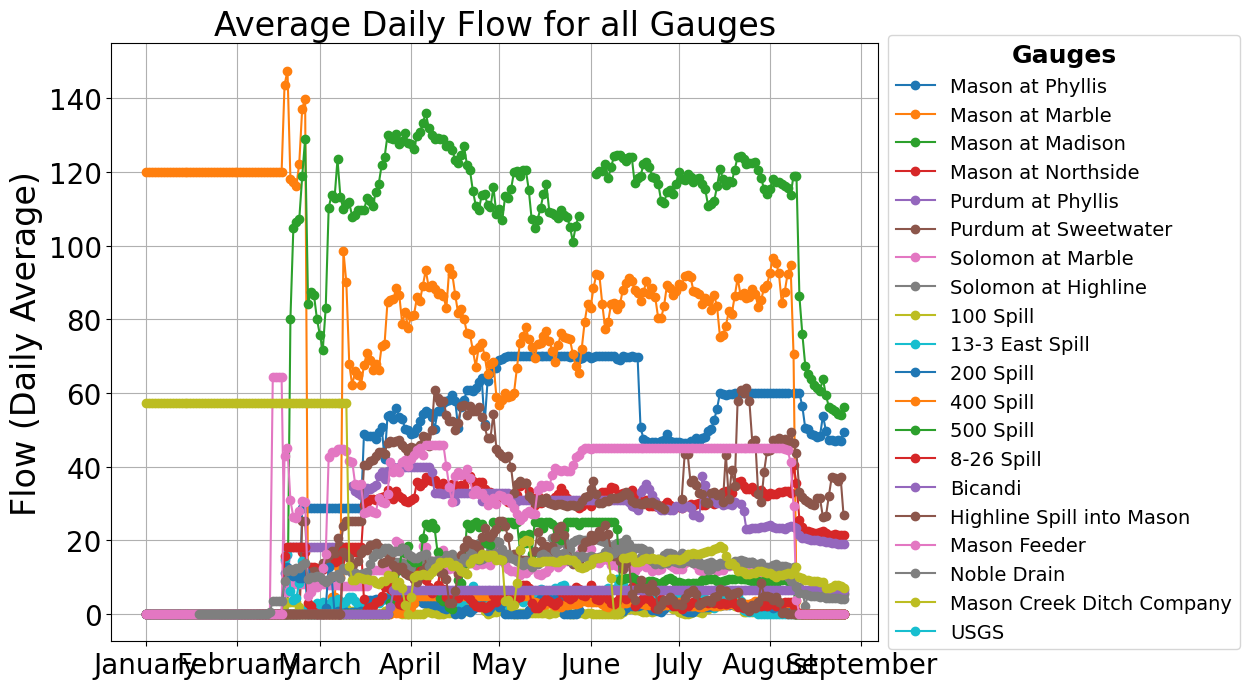

In [35]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

filtered_df = df[(df[date_column_name] >= start_date) & (df[date_column_name] <= end_date)]

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12']

plt.figure(figsize=(14, 7))

for gauge in filtered_df['Gauge'].unique():
    gauge_data = filtered_df[filtered_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow(cfs)'], marker='o', label=gauge)

plt.title('Average Daily Flow for all Gauges', fontsize = 24)
plt.xlabel('')
plt.ylabel('Flow (Daily Average)', fontsize = 24)
plt.legend()
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/all_flow.png', dpi=300, bbox_inches='tight')
plt.show()

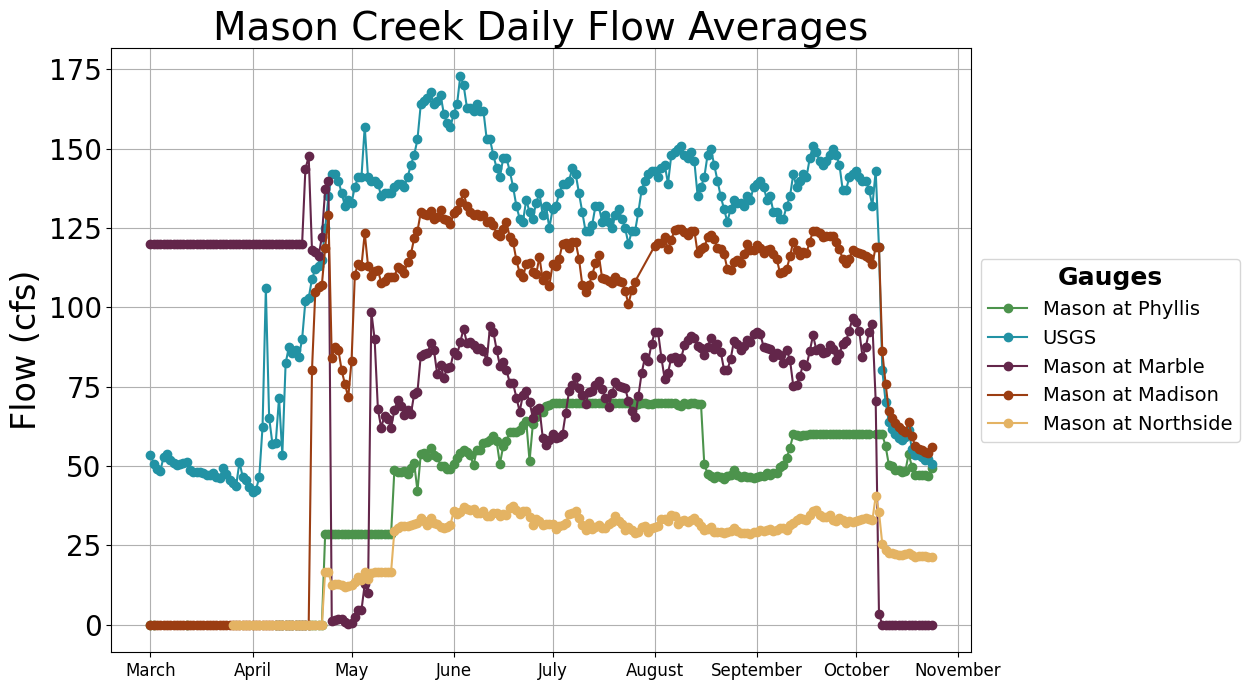

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# MASON GAUGES ONLY

selected_gauges = ['Mason at Phyllis', 'USGS', 'Mason at Marble','Mason at Madison', 'Mason at Northside']

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12', '#E4B363']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Mason Creek Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/mason_flow.png', dpi=300, bbox_inches='tight')
plt.show()

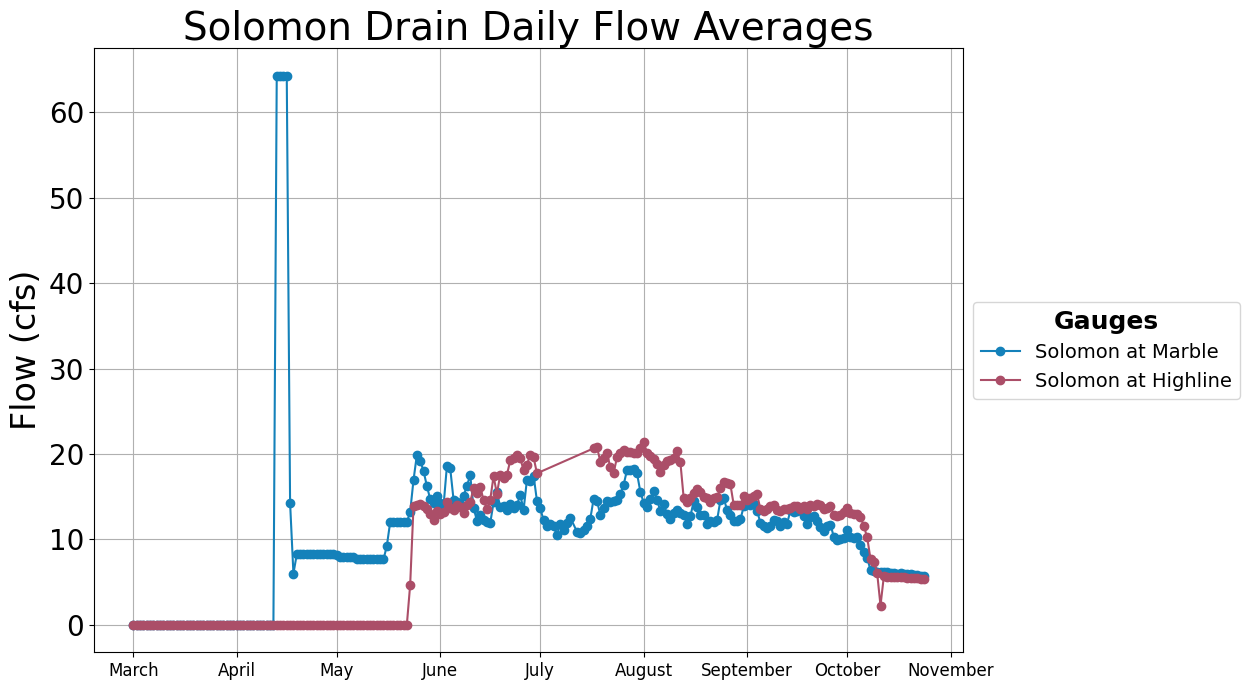

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# SOLOMON GAUGES ONLY

selected_gauges = ['Solomon at Marble', 'Solomon at Highline']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Solomon Drain Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks( fontsize=12)
plt.yticks(fontsize=20)


legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/solomon_flow.png', dpi=300, bbox_inches='tight')
plt.show()

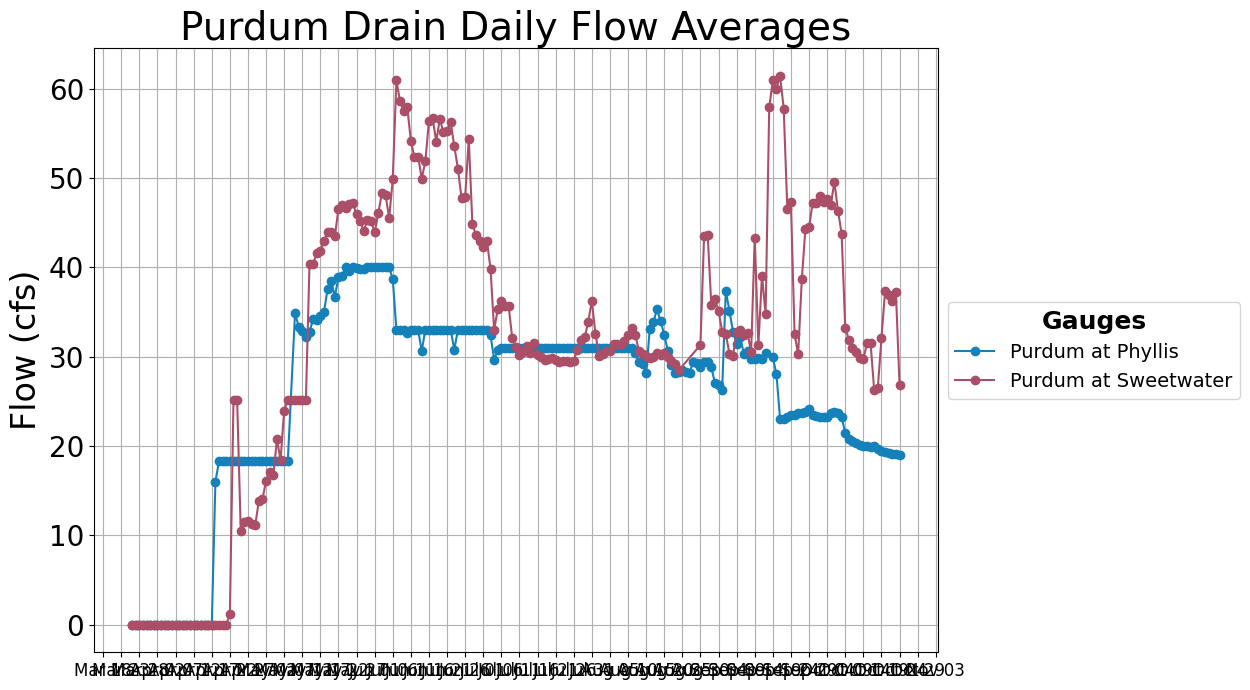

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# PURDUM GAUGES ONLY

selected_gauges = ['Purdum at Phyllis', 'Purdum at Sweetwater']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data['Date'], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Purdum Drain Daily Flow Averages', fontsize=28)
plt.xlabel('', fontsize = 1)
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Set x-axis major locator to show ticks every five days and format to month and day
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # '%b %d' shows abbreviated month and day

plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/purdum_flow.png', dpi=300, bbox_inches='tight')
plt.show()

## Calculate Cumulative Monthly Discharge

In [ ]:
# ----------------------------------------------- #
# Calculate the total volume of monthly flow (AF)
# ----------------------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_continuous_flow.csv')

# Convert 'Date' to datetime and keep necessary columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[['Gauge', 'Date', 'Flow(cfs)']].dropna(subset=['Date', 'Flow(cfs)'])  # Drop rows with NaN in Date or Flow(cfs)

# Ensure 'Flow(cfs)' is numeric
df['Flow(cfs)'] = pd.to_numeric(df['Flow(cfs)'], errors='coerce')
df = df.dropna(subset=['Flow(cfs)'])  # Drop rows with NaN in Flow(cfs) after conversion

# Initialize list to store monthly cumulative flows for each gauge
monthly_cumulative_flow = []

# Group by 'Gauge' and process each gauge's data separately
for gauge, gauge_data in df.groupby('Gauge'):
    # Sort data by 'Date', set 'Date' as index, and keep only 'Flow(cfs)' column
    gauge_data = gauge_data.sort_values(by='Date').set_index('Date')[['Flow(cfs)']]

    # Resample to daily frequency and calculate daily volume
    gauge_daily = gauge_data.resample('D').mean()
    gauge_daily['Daily_Volume'] = gauge_daily['Flow(cfs)'] * 86400  # Convert flow to daily volume in cubic feet

    # Fill any NaN in 'Daily_Volume' after resampling with 0
    gauge_daily['Daily_Volume'].fillna(0, inplace=True)

    # Resample to get monthly cumulative volume in acre-feet
    gauge_monthly = gauge_daily['Daily_Volume'].resample('M').sum() / 43560  # Convert to acre-feet

    # Create DataFrame for this gauge's monthly data
    gauge_monthly_df = pd.DataFrame({
        'Gauge': gauge,
        'Month': gauge_monthly.index,
        'Cumulative Flow (AF)': gauge_monthly.values
    })

    # Append to the list
    monthly_cumulative_flow.append(gauge_monthly_df)

monthly_df = pd.concat(monthly_cumulative_flow, ignore_index=True)
monthly_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/monthly_flow.csv', index=False)

In [144]:
# --------------------------------- #
# Calculate Reach Inflows & Outflows
# --------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/monthly_flow.csv')
# Convert 'Month' column to datetime and format it as 'yyyy-mm'
df['Month'] = pd.to_datetime(df['Month']).dt.to_period('M').dt.strftime('%Y-%m')

final_df = []

# ------ #
# Reach 1
# ------ #
qin_r1 = df[df['Gauge'] == "Mason at Phyllis"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})
qout_r1 = df[df['Gauge'] == "Mason at Madison"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})
reach_1_df = pd.merge(qin_r1, qout_r1, on='Month', how='inner')
reach_1_df.insert(0, 'Reach', 'Reach 1')
final_df = reach_1_df

# ------ #
# Reach 2
# ------ #
qin_r2_mason = df[df['Gauge'] == "Mason at Madison"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Mason'})
qin_r2_purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Purdum'})
qout_r2 = df[df['Gauge'] == "Mason at Northside"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

# Merge Qin components for Reach 2
qin_r2 = pd.merge(qin_r2_mason, qin_r2_purdum, on='Month', how='inner')
qin_r2['Qin'] = qin_r2['Qin_Mason'] + qin_r2['Qin_Purdum']  # Sum Qin values
qin_r2 = qin_r2[['Month', 'Qin']]  # Keep only 'Month' and total 'Qin'

# Merge Qin and Qout for Reach 2 based on 'Month'
reach_2_df = pd.merge(qin_r2, qout_r2, on='Month', how='inner')
reach_2_df.insert(0, 'Reach', 'Reach 2')  # Add 'Reach' column with 'Reach 2'

# Append Reach 2 to final_df
final_df = pd.concat([final_df, reach_2_df], ignore_index=True)

# ------ #
# Reach 3
# ------ #
# Define Qin gauges for Reach 3
qin_r3_northside = df[df['Gauge'] == "Mason at Northside"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Northside'})
qin_r3_8_26_spill = df[df['Gauge'] == "8-26 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_8_26_Spill'})
qin_r3_high_line_spill = df[df['Gauge'] == "Highline Spill into Mason"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_High_Line_Spill'})
qin_r3_100_spill = df[df['Gauge'] == "100 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_100_Spill'})
qin_r3_noble_drain = df[df['Gauge'] == "Noble Drain"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Noble_Drain'})

# Merge all Qin components for Reach 3
qin_r3 = qin_r3_northside
qin_r3 = pd.merge(qin_r3, qin_r3_8_26_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_high_line_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_100_spill, on='Month', how='inner')
qin_r3 = pd.merge(qin_r3, qin_r3_noble_drain, on='Month', how='inner')

# Sum all Qin components for Reach 3
qin_r3['Qin'] = qin_r3[['Qin_Northside', 'Qin_8_26_Spill', 'Qin_High_Line_Spill', 'Qin_100_Spill', 'Qin_Noble_Drain']].sum(axis=1)
qin_r3 = qin_r3[['Month', 'Qin']]  # Keep only 'Month' and total 'Qin'

# Define Qout gauges for Reach 3
qout_r3_mason_feeder = df[df['Gauge'] == "Mason Feeder"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Mason_Feeder'})
qout_r3_marble_front = df[df['Gauge'] == "Mason at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Marble_Front'})

# Merge Qout components for Reach 3
qout_r3 = pd.merge(qout_r3_mason_feeder, qout_r3_marble_front, on='Month', how='inner')

# Sum Qout components for Reach 3
qout_r3['Qout'] = qout_r3[['Qout_Mason_Feeder', 'Qout_Marble_Front']].sum(axis=1)
qout_r3 = qout_r3[['Month', 'Qout']]  # Keep only 'Month' and total 'Qout'

# Merge Qin and Qout for Reach 3 based on 'Month'
reach_3_df = pd.merge(qin_r3, qout_r3, on='Month', how='inner')
reach_3_df.insert(0, 'Reach', 'Reach 3')  # Add 'Reach' column with 'Reach 3'

# Append Reach 3 to final_df
final_df = pd.concat([final_df, reach_3_df], ignore_index=True)

# ------ #
# Reach 4
# ------ #
# Define Qin gauges for Reach 4
qin_r4_marble = df[df['Gauge'] == "Mason at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Marble'})
qin_r4_solomon = df[df['Gauge'] == "Solomon at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_Solomon'})
qin_r4_400_spill = df[df['Gauge'] == "400 Spill"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin_400_Spill'})

# Merge all Qin components for Reach 4
qin_r4 = qin_r4_marble
qin_r4 = pd.merge(qin_r4, qin_r4_solomon, on='Month', how='inner')
qin_r4 = pd.merge(qin_r4, qin_r4_400_spill, on='Month', how='inner')

# Sum all Qin components for Reach 4
qin_r4['Qin'] = qin_r4[['Qin_Marble', 'Qin_Solomon', 'Qin_400_Spill']].sum(axis=1)
qin_r4 = qin_r4[['Month', 'Qin']]  # Keep only 'Month' and total 'Qin'

# Define Qout gauges for Reach 4
qout_r4_bicandi = df[df['Gauge'] == "Bicandi"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Bicandi'})
qout_r4_usgs = df[df['Gauge'] == "USGS"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_USGS'})
qout_r4_mason_creek_ditch = df[df['Gauge'] == "Mason Creek Ditch Company"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout_Mason_Creek_Ditch'})

# Merge Qout components for Reach 4
qout_r4 = qout_r4_bicandi
qout_r4 = pd.merge(qout_r4, qout_r4_usgs, on='Month', how='inner')
qout_r4 = pd.merge(qout_r4, qout_r4_mason_creek_ditch, on='Month', how='inner')

# Sum Qout components for Reach 4
qout_r4['Qout'] = qout_r4[['Qout_Bicandi', 'Qout_USGS', 'Qout_Mason_Creek_Ditch']].sum(axis=1)
qout_r4 = qout_r4[['Month', 'Qout']]  # Keep only 'Month' and total 'Qout'

# Merge Qin and Qout for Reach 4 based on 'Month'
reach_4_df = pd.merge(qin_r4, qout_r4, on='Month', how='inner')
reach_4_df.insert(0, 'Reach', 'Reach 4')  # Add 'Reach' column with 'Reach 4'
final_df = pd.concat([final_df, reach_4_df], ignore_index=True)


# ------------ #
# Solomon Reach
# ------------ #
# Define Qin gauge for Solomon Reach
qin_solomon = df[df['Gauge'] == "Solomon at Highline"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})

# Define Qout gauge for Solomon Reach
qout_solomon = df[df['Gauge'] == "Solomon at Marble"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

# Merge Qin and Qout for Solomon Reach based on 'Month'
solomon_reach_df = pd.merge(qin_solomon, qout_solomon, on='Month', how='inner')
solomon_reach_df.insert(0, 'Reach', 'Solomon Reach')  # Add 'Reach' column with 'Solomon Reach'

# Append Solomon Reach to final_df
final_df = pd.concat([final_df, solomon_reach_df], ignore_index=True)

# ------------ #
# Purdum Reach
# ------------ #
# Define Qin gauge for Purdum Reach
qin_purdum = df[df['Gauge'] == "Purdum at Phyllis"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qin'})

# Define Qout gauge for Purdum Reach
qout_purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Month', 'Cumulative Flow (AF)']].rename(columns={'Cumulative Flow (AF)': 'Qout'})

# Merge Qin and Qout for Purdum Reach based on 'Month'
purdum_reach_df = pd.merge(qin_purdum, qout_purdum, on='Month', how='inner')
purdum_reach_df.insert(0, 'Reach', 'Purdum Reach')  # Add 'Reach' column with 'Purdum Reach'

# Append Purdum Reach to final_df
final_df = pd.concat([final_df, purdum_reach_df], ignore_index=True)

final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_monthly_flow.csv', index=False)

## Plot of Change in Flow

In [131]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
# ---------------------------- #
# Calculate Reach Gains/Losses
# --------------------------- #
def calculate_flow_difference(df):
    """
    Calculate the flow difference (Qout - Qin) in acre-feet (AF) for each Gauge at each Month.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Gauge', 'Month', 'Qin', and 'Qout' columns.

    Returns:
    pd.DataFrame: DataFrame with an additional 'Flow Difference (AF)' column.
    """
    # Ensure 'Qin' and 'Qout' are numeric
    df['Qin'] = pd.to_numeric(df['Qin'], errors='coerce')
    df['Qout'] = pd.to_numeric(df['Qout'], errors='coerce')

    # Calculate the flow difference in AF
    df['Flow Difference (AF)'] = df['Qout'] - df['Qin']

    return df
final_df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/final_monthly_flow.csv')
# Calculate the flow difference
final_df_with_difference = calculate_flow_difference(final_df)

# Convert 'Month' to period in 'yyyy-mm' format, then back to string for plotting
final_df_with_difference['Month'] = pd.PeriodIndex(final_df_with_difference['Month'], freq='M').astype(str)

# Now convert the flow difference to KAF
final_df_with_difference['Flow Difference (KAF)'] = final_df_with_difference['Flow Difference (AF)'] / 1000

# Display the final DataFrame with Flow Difference in AF and KAF
print("\nDataFrame with Flow Difference in AF and KAF:\n", final_df_with_difference)


DataFrame with Flow Difference in AF and KAF:
             Reach    Month           Qin          Qout  Flow Difference (AF)  \
0         Reach 1  2024-03      0.000000      0.000000              0.000000   
1         Reach 1  2024-04    455.404959   2246.678812           1791.273853   
2         Reach 1  2024-05   2535.714603   7210.384376           4674.669772   
3         Reach 1  2024-06   3492.392564   7249.747727           3757.355163   
4         Reach 1  2024-07   4299.476337   5747.071748           1447.595412   
5         Reach 1  2024-08   3573.177377   7349.440747           3776.263371   
6         Reach 1  2024-09   3329.076752   7037.779956           3708.703204   
7         Reach 1  2024-10   2419.288658   3833.133573           1413.844915   
8         Reach 2  2024-03      0.000000      0.000000              0.000000   
9         Reach 2  2024-04   2487.643138    215.509370          -2272.133768   
10        Reach 2  2024-05   9346.592286   1529.178983          -7817.41

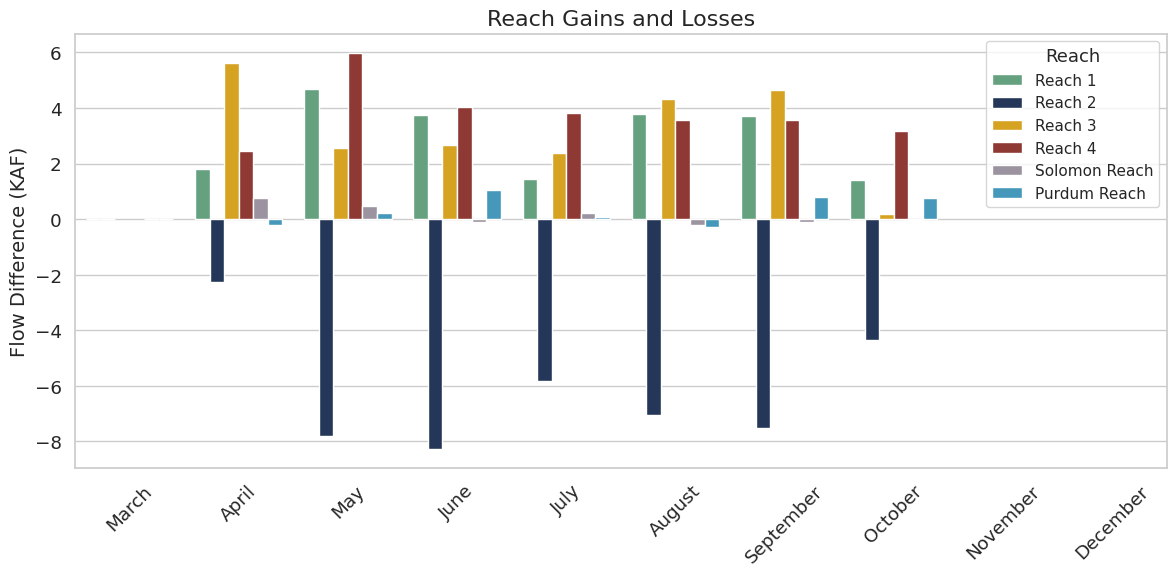

In [162]:
# ------------------------- #
# Plot of Reach Gains/Losses
# ------------------------- #

final_df_with_difference['Month'] = pd.to_datetime(final_df_with_difference['Month'], format='%Y-%m')
final_df_with_difference['Month'] = final_df_with_difference['Month'].dt.strftime('%B')  # Convert to month names

# filter out January and February
final_df_with_difference = final_df_with_difference[~final_df_with_difference['Month'].isin(['January', 'February'])]

sns.set(style="whitegrid", font_scale=1.2)

# custom colors
custom_palette = {
    "Reach 1": "#5CAB7D",
    "Reach 2": "#1D3461",
    "Reach 3": "#F3AF04",
    "Reach 4": "#9E2B25",
    "Purdum Reach": "#32A0CF",
    "Solomon Reach": "#9D91A3"
}


plt.figure(figsize=(12, 6))
sns.barplot(
    data=final_df_with_difference,
    x='Month', y='Flow Difference (KAF)', hue='Reach',
    palette=custom_palette,
    order=['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot labels
plt.title("Reach Gains and Losses", fontsize=16)
plt.xlabel("")
plt.ylabel("Flow Difference (KAF)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Reach", title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()